<a href="https://colab.research.google.com/github/RoccoBellusci/MLPNS_RBellusci/blob/main/DeepLearning/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Originally from https://iamtrask.github.io/2015/07/12/basic-python-network/

In [22]:
import numpy as np
import pylab as pl

In [23]:
# input data
X = np.array(
    [[0,0,1],
     [1,1,1],
     [1,0,1],
     [0,1,1]])

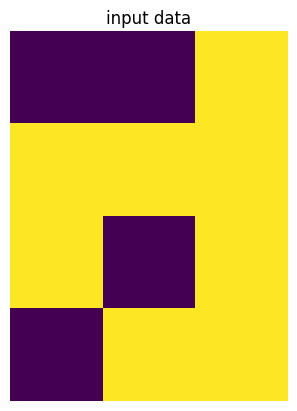

In [24]:
pl.imshow(X);
pl.axis('off');
pl.title("input data");

In [25]:
# output data
y = np.array([[0,1,1,0]]).T
y

array([[0],
       [1],
       [1],
       [0]])

In [26]:
y.shape

(4, 1)

In [27]:
print("input\n", X)
print("output\n", y)

input
 [[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
output
 [[0]
 [1]
 [1]
 [0]]


# basic architecture: 1 layer
4 osservazioni

3 neuroni

1 layer

In [28]:
def sigmoid(x):
  ''' activation function
  Input: x array-like - the input from the neuron multilinear regression 
  Output: sigmoid value of each input '''
  return 1. / (1. + np.exp(-x))

In [29]:
def dsigmoid(s):
  ''' functional form of the derivative of the sigmoid function:
  Input: the output of a layer (passed through the activation function: sigpoid(M-P neuron output))
  Output: the derivative at the output value'''
  return  s * (1. - s)

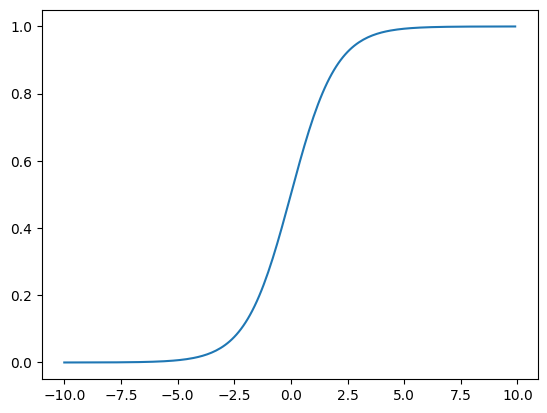

In [30]:
pl.plot(np.arange(-10, 10, 0.1), sigmoid(np.arange(-10, 10, 0.1)));

In [31]:
def loss(prediction, target):
  """ per neuron difference of target and data
  Input: 
  target : training labels
  prediction : array-like (same dimensions as target)"""
  return target - prediction

## Neural network 

In [32]:

training = 6000

In [33]:
# layer of synopses / neurons
# 4 x 3 dot 3 x 1 


In [34]:
np.random.seed(302)

syn0 =  2 * np.random.random((3, 1)) - 1 #normalized 0-1
print(syn0.shape)
print(syn0)

loss_output = []

for iter in range(training):
  inputLayer = X
  
  # forward propagation

  #linear regression (dot product linear algebra solution)
  l1 = np.dot(inputLayer, syn0)
  #activations
  output = sigmoid(l1)
  #calculate error
  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())

  # backward propagation

  #caluclate correction
  output_delta = output_error * dsigmoid(output)
  #apply correction to weights
  syn0 += np.dot(inputLayer.T, output_delta)

print("output after training\n", output)
print("output target\n", y)

(3, 1)
[[ 0.27256242]
 [ 0.65008468]
 [-0.31671053]]
output after training
 [[0.01254551]
 [0.98977455]
 [0.99169035]
 [0.0101995 ]]
output target
 [[0]
 [1]
 [1]
 [0]]


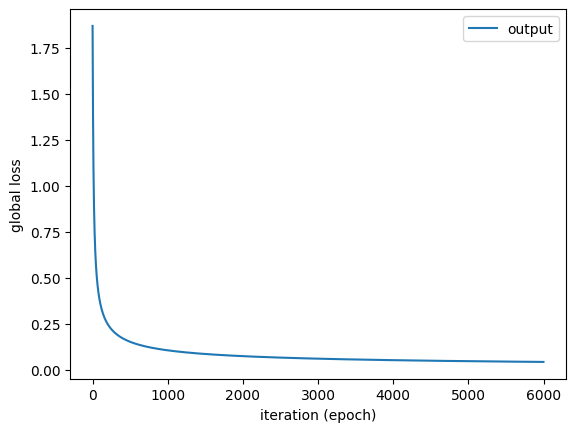

In [35]:
pl.plot(loss_output, label="output")
pl.legend()
pl.xlabel("iteration (epoch)")
pl.ylabel("global loss");

In [36]:
np.random.seed(302)

# 4x3 -> 3x5 ->5x1 => 4x1
syn0 =  2 * np.random.random((3, 5)) - 1 #normalized 0-1
syn1 =  2 * np.random.random((5, 1)) - 1 #normalized 0-1


loss_output = []
loss_hidden = []

for iter in range(training):
  inputLayer = X
  
  # forward propagation

  #linear regression (dot product linear algebra solution)
  l1 = np.dot(inputLayer, syn0)
  #activations
  hidden = sigmoid(l1)

  l2 = np.dot(hidden, syn1)
  #activations
  output = sigmoid(l2)

  #calculate error
  output_error = loss(output, y)
  loss_output.append(np.abs(output_error).sum())
  # backward propagation

  #caluclate correction
  output_delta = output_error * dsigmoid(output)

  # MODIFIED: error on the first layer 
  hidden_error = output_delta.dot(syn1.T)
  loss_hidden.append(np.abs(hidden_error).sum())

  hidden_delta = hidden_error * dsigmoid(hidden)

  #apply correction to weights
  syn0 += np.dot(inputLayer.T, hidden_delta)
  syn1 += np.dot(hidden.T, output_delta)

print("output after training\n", output)
print("output target\n", y)

output after training
 [[0.00648042]
 [0.99370941]
 [0.99426848]
 [0.00489822]]
output target
 [[0]
 [1]
 [1]
 [0]]


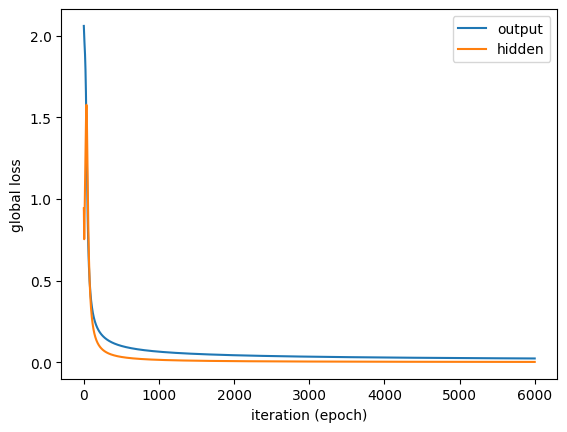

In [37]:
pl.plot(loss_output, label="output")
pl.plot(loss_hidden, label="hidden")
pl.legend()
pl.xlabel("iteration (epoch)")
pl.ylabel("global loss");

In [38]:
from tensorflow import keras

In [39]:
#hidden layer
hlayer = keras.layers.Dense(5, input_dim = 3, activation = 'sigmoid') # input 1 : numero di neuroni che voglio nel mio layer

#output layer
olayer = keras.layers.Dense(1, activation = "linear")

model = keras.Sequential([hlayer, olayer]) # il mio modello

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss = "mae", optimizer = "adam", metrics = ["accuracy", "mae"]) # devo fare tutte le mie scelte architettoniche: 1) mae -> min absolute error
                                                                           

In [42]:
model.fit(X, y, epochs = 1000);

Epoch 1/1000
1/1 [==============================] - 0s 12ms/step - loss: 8.1255e-04 - accuracy: 1.0000 - mae: 8.1255e-04
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 6.2535e-04 - accuracy: 1.0000 - mae: 6.2535e-04
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 6.2071e-04 - accuracy: 1.0000 - mae: 6.2071e-04
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 7.8280e-04 - accuracy: 1.0000 - mae: 7.8280e-04
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.0911e-04 - accuracy: 1.0000 - mae: 6.0911e-04
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 6.0216e-04 - accuracy: 1.0000 - mae: 6.0216e-04
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 5.9392e-04 - accuracy: 1.0000 - mae: 5.9392e-04
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.7386e-04 - accuracy: 1.0000 - mae: 6.7386e-04
Epoch 9/1000
1/1 [==============

In [43]:
model.predict(X)

1/1 [==============================] - 0s 142ms/step


array([[-2.7848408e-04],
       [ 1.0001055e+00],
       [ 1.0000219e+00],
       [-1.6699359e-04]], dtype=float32)

In [44]:
y

array([[0],
       [1],
       [1],
       [0]])

In [ ]:
keras.layers